# 1  - Interpreting clustering and dimensionality reduction outcomes

Apply clustering and dimensionality reduction techniques to a dataset and interpret the outcomes. You will use both k-means clustering and principal component analysis (PCA) or t-distributed stochastic neighbor embedding (t-SNE) to analyze a dataset and uncover hidden patterns or clusters. The goal is to understand how these techniques work together to simplify data and reveal meaningful groupings.

By the end of this activity, you'll be able to:

Apply k-means clustering: learn how this technique can help to identify distinct clusters in data.

Perform dimensionality reduction: use PCA or t-SNE to reduce the dataset's dimensions, making it easier to visualize and analyze high-dimensional data while retaining significant patterns.

Visualize and interpret results: create scatter plots to visualize clusters and dimensionality reduction outcomes, and interpret how these methods reveal hidden patterns or simplify complex datasets.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
# Create a sample dataset with customer annual income, spending score, and age
data = {'AnnualIncome': [15, 16, 17, 18, 19, 20, 22, 25, 30, 35],
        'SpendingScore': [39, 81, 6, 77, 40, 76, 94, 5, 82, 56],
        'Age': [20, 22, 25, 24, 35, 40, 30, 21, 50, 31]}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore  Age
0            15             39   20
1            16             81   22
2            17              6   25
3            18             77   24
4            19             40   35


In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore', 'Age'])
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age
0     -1.086741      -0.546384 -1.074654
1     -0.924540       0.836033 -0.855337
2     -0.762340      -1.632569 -0.526361
3     -0.600140       0.704374 -0.636020
4     -0.437940      -0.513469  0.570225


Applying k-means clustering
Now, apply k-means clustering to group the customers into clusters based on their spending behavior and income. Use k = 3 clusters for this task:

In [5]:
from sklearn.cluster import KMeans

# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Display the cluster assignments
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age  KMeans_Cluster
0     -1.086741      -0.546384 -1.074654               2
1     -0.924540       0.836033 -0.855337               0
2     -0.762340      -1.632569 -0.526361               2
3     -0.600140       0.704374 -0.636020               0
4     -0.437940      -0.513469  0.570225               2


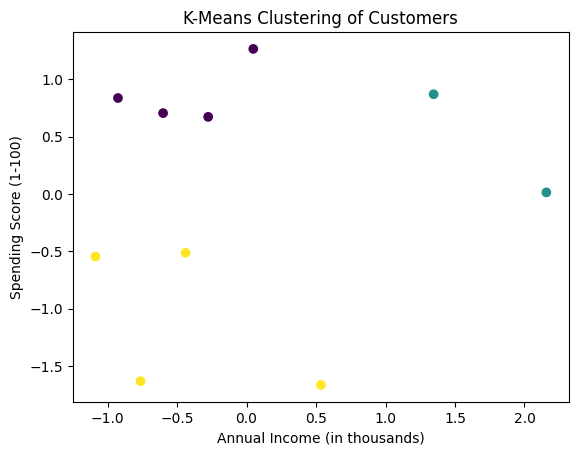

In [6]:
# Visualize the K-Means clusters
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Applying dimensionality reduction (PCA or t-SNE)
Next, reduce the dimensionality of the dataset to two components for visualization. You can use PCA or t-SNE.

For PCA:

In [7]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert the PCA result back to a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
print(df_pca.head())

       PCA1      PCA2
0 -1.727176 -0.576167
1  0.282610 -1.762704
2 -2.032233  0.275256
3  0.414749 -1.395518
4 -0.658721  0.581370


for s-SNE

In [8]:
from sklearn.manifold import TSNE

# Set perplexity to a value smaller than the number of samples
tsne = TSNE(n_components=2, perplexity=5, random_state=42)

df_tsne = tsne.fit_transform(df_scaled)

# Convert the t-SNE result back to a DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=['t-SNE1', 't-SNE2'])
print(df_tsne.head())

      t-SNE1     t-SNE2
0  18.821220  26.394646
1 -70.246437 -67.602654
2  34.689503  65.861794
3 -49.581539 -35.680065
4  -7.743770  61.515194


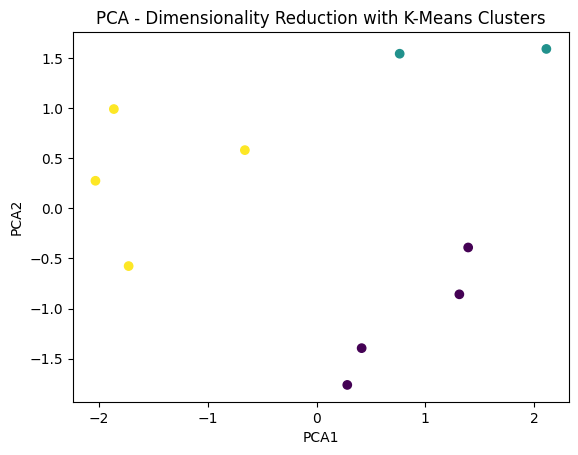

In [9]:
# Visualize the PCA components
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('PCA - Dimensionality Reduction with K-Means Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

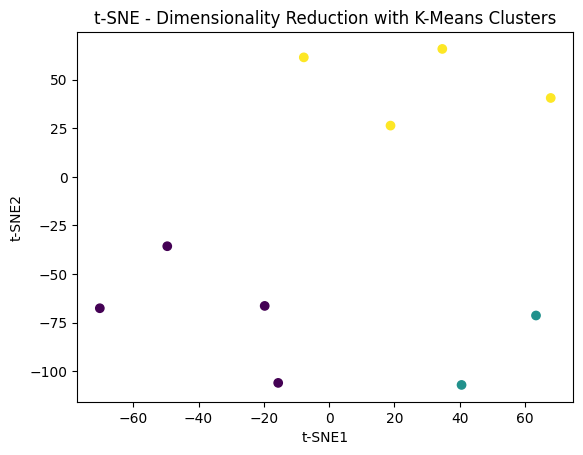

In [10]:
# Visualize the t-SNE components
plt.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('t-SNE - Dimensionality Reduction with K-Means Clusters')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

fter performing the clustering and dimensionality reduction, you interpreted the results based on the visualizations and the cluster assignments. Here are some key points to consider:

K-means clustering:

How well did k-means group similar customers? Did the clusters make sense based on the features?

Were the clusters distinct or overlapping? If there was significant overlap, increasing or decreasing k—the number of clusters—could improve the result.

Dimensionality reduction:

PCA: How much variance was captured by the two principal components? If a large percentage of variance was retained—e.g., more than 80 percent—PCA provided a good summary of the dataset.

t-SNE: Did t-SNE reveal any hidden patterns or clusters that were not obvious in the original dataset? t-SNE is often better at visualizing clusters when the dataset has nonlinear relationships.

Conclusion:

PCA simplifies the dataset while retaining global variance, making it useful for visualizing data with linear relationships.

t-SNE excels at preserving local structures and is particularly effective for visualizing nonlinear clusters.

Both techniques worked well together with k-means to group the customers and reveal meaningful patterns in the dataset.

Together, clustering and dimensionality reduction techniques are powerful tools for analyzing and visualizing high-dimensional data. They help reveal hidden patterns, simplify complex datasets, and provide insights into the underlying structure of the data. K-means clustering, combined with PCA or t-SNE, offers a comprehensive approach to understanding and interpreting data effectively.